<a href="https://colab.research.google.com/github/lcroffi/CNN/blob/master/CNN_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [0]:
img_width, img_height = 299, 299

In [3]:
# importa o modelo InceptionV3 e descarta a última camada do classifier.
base_model=InceptionV3(weights='imagenet',include_top=False, input_shape=(img_width, img_height, 3))

W0717 16:29:30.877536 140452496836480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 16:29:30.920881 140452496836480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 16:29:30.928847 140452496836480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 16:29:30.966388 140452496836480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0717 16:29:30.967934 1404524968

87916544/87910968 [==============================] - 18s 0us/step


In [20]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_2
1 conv2d_95
2 batch_normalization_95
3 activation_95
4 conv2d_96
5 batch_normalization_96
6 activation_96
7 conv2d_97
8 batch_normalization_97
9 activation_97
10 max_pooling2d_5
11 conv2d_98
12 batch_normalization_98
13 activation_98
14 conv2d_99
15 batch_normalization_99
16 activation_99
17 max_pooling2d_6
18 conv2d_103
19 batch_normalization_103
20 activation_103
21 conv2d_101
22 conv2d_104
23 batch_normalization_101
24 batch_normalization_104
25 activation_101
26 activation_104
27 average_pooling2d_10
28 conv2d_100
29 conv2d_102
30 conv2d_105
31 conv2d_106
32 batch_normalization_100
33 batch_normalization_102
34 batch_normalization_105
35 batch_normalization_106
36 activation_100
37 activation_102
38 activation_105
39 activation_106
40 mixed0
41 conv2d_110
42 batch_normalization_110
43 activation_110
44 conv2d_108
45 conv2d_111
46 batch_normalization_108
47 batch_normalization_111
48 activation_108
49 activation_111
50 average_pooling2d_11
51 conv2d_107
52 conv2d_109
53 co

In [4]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

W0717 16:30:23.522944 140452496836480 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
for layer in base_model.layers:
    layer.trainable = False
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [9]:
optimizer = Adam(lr=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

W0717 16:33:48.526302 140452496836480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Baixar as imagens do exame de citologia cervical
!wget -cq https://citologia-cervical.s3-sa-east-1.amazonaws.com/citologia.zip
!unzip -qq citologia.zip

In [0]:
train_datagen=ImageDataGenerator(preprocessing_function = preprocess_input) # incluído nas dependências

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [8]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (img_width, img_height),
                                                 color_mode='rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

validation_set = validation_datagen.flow_from_directory('valid',
                                                        target_size = (img_width, img_height),
                                                        color_mode='rgb',
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle=True)

Found 423 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [23]:
history = model.fit_generator(training_set,
                    steps_per_epoch=528/32,
                    epochs = 20,
                    validation_data = validation_set,
                    validation_steps = 105/32)

Epoch 1/20
17/16 [==============================] - 17s 977ms/step - loss: 3.5693 - acc: 0.4014 - val_loss: 7.3988 - val_acc: 0.4286
Epoch 2/20
17/16 [==============================] - 8s 452ms/step - loss: 1.3984 - acc: 0.6109 - val_loss: 3.3683 - val_acc: 0.5524
Epoch 3/20
17/16 [==============================] - 8s 452ms/step - loss: 0.7120 - acc: 0.7498 - val_loss: 8.7976 - val_acc: 0.4190
Epoch 4/20
17/16 [==============================] - 8s 453ms/step - loss: 0.2924 - acc: 0.8943 - val_loss: 9.7229 - val_acc: 0.3905
Epoch 5/20
17/16 [==============================] - 8s 443ms/step - loss: 0.2125 - acc: 0.9296 - val_loss: 8.2746 - val_acc: 0.4381
Epoch 6/20
17/16 [==============================] - 8s 451ms/step - loss: 0.1975 - acc: 0.9311 - val_loss: 9.7465 - val_acc: 0.3905
Epoch 7/20
17/16 [==============================] - 8s 452ms/step - loss: 0.3006 - acc: 0.9360 - val_loss: 6.6510 - val_acc: 0.4952
Epoch 8/20
17/16 [==============================] - 8s 451ms/step - loss: 0

In [0]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

In [0]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.000001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
from google.colab import drive
from keras.callbacks import *

drive.mount('/content/drive')
filepath="/content/drive/My Drive/Colab Notebooks/log/inceptionv3:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [25]:
# Fine-tune
history = model.fit_generator(training_set,
                    steps_per_epoch=528/32,
                    epochs = 100,
                    validation_data = validation_set,
                    validation_steps = 105/32,
                    callbacks=callbacks_list)

Epoch 1/100
17/16 [==============================] - 16s 962ms/step - loss: 0.0852 - acc: 0.9760 - val_loss: 5.8975 - val_acc: 0.5429

Epoch 00001: val_acc improved from 0.50476 to 0.54286, saving model to /content/drive/My Drive/Colab Notebooks/log/inceptionv3:001-val_acc:0.543.hdf5
Epoch 2/100
17/16 [==============================] - 7s 440ms/step - loss: 0.0749 - acc: 0.9760 - val_loss: 4.5679 - val_acc: 0.5905

Epoch 00002: val_acc improved from 0.54286 to 0.59048, saving model to /content/drive/My Drive/Colab Notebooks/log/inceptionv3:002-val_acc:0.590.hdf5
Epoch 3/100
17/16 [==============================] - 7s 440ms/step - loss: 0.0566 - acc: 0.9816 - val_loss: 4.2595 - val_acc: 0.5714

Epoch 00003: val_acc did not improve from 0.59048
Epoch 4/100
17/16 [==============================] - 8s 447ms/step - loss: 0.1645 - acc: 0.9765 - val_loss: 3.3156 - val_acc: 0.6000

Epoch 00004: val_acc improved from 0.59048 to 0.60000, saving model to /content/drive/My Drive/Colab Notebooks/lo

In [0]:
# Carregando o modelo com o peso melhor treinado (exemplo: carregando epoch 47, validation accuracy de 90.5%)

model.load_weights('/content/drive/My Drive/Colab Notebooks/log/inceptionv3:009-val_acc:0.695.hdf5')

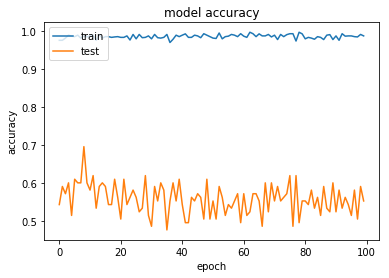

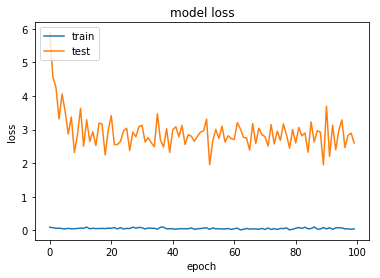

In [26]:
import matplotlib.pyplot as plt

# Gráfico de treino - acurácia
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Gráfico de treino - perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
# métricas de perda e acurácia
score = model.evaluate_generator(validation_set, 105)

print ("%s: %.2f%%" % (model.metrics_names[0], score[0]*100))
print ("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

loss: 302.82%
acc: 61.96%


In [30]:
!pip install --upgrade --quiet PyDrive
# para conectar com o Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
# Salvando o modelo no drive

model.save("model_inceptionv3.h5")
uploaded = drive.CreateFile({'title': 'model_inceptionv3.h5'})
uploaded.SetContentFile('model_inceptionv3.h5')
uploaded.Upload()